In [1]:
import numpy as np
import random
from collections import Counter

In [8]:
########读取机器学习数据集的示例代码 (LIBSVM格式)
def load_svmfile(filename):
    X = []
    Y = []
    with open(filename, 'r') as f:
        filelines = f.readlines()
        for fileline in filelines:
            fileline = fileline.strip().split(' ')
            #print(fileline)
            Y.append(int(fileline[0]))
            tmp = []
            for t in fileline[1:]:
                if len(t)==0:
                    continue
                tmp.append(float(t.split(':')[1]))
            X.append(tmp)
    
    return np.array(X), np.array(Y)

In [10]:
########从这个网址下载数据集：https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#svmguide1
########将数据集保存在当前目录下
########读取数据集
dataset = 'svmguide1'
print('Start loading dataset {}'.format(dataset))
X, Y = load_svmfile(dataset) # train set
X_test, Y_test = load_svmfile('{}.t'.format(dataset)) # test set
print('trainset X shape {}, train label Y shape {}'.format(X.shape, Y.shape))
print('testset X_test shape {}, test label Y shape {}'.format(X_test.shape, Y_test.shape))

print('load success!')

Start loading dataset svmguide1
trainset X shape (3089, 4), train label Y shape (3089,)
testset X_test shape (4000, 4), test label Y shape (4000,)
load success!


In [61]:
########实现一个KNN分类器的模型，需要完成的功能包括train, test和_calculate_distances三部分
class KNN_model():
    def __init__(self, k=1):
        self.k = k
    
    def train(self, x_train, y_train):
        """Implement the training code for KNN
        Input: 
            x_train: Training instances of size (N, D), where N denotes the number of instances and D denotes the feature dimension
            y_train: Training labels of size (N, )
        """
        self.x_train = x_train
        self.y_train = y_train
    
    def test(self, x_test):
        """
        Input: Test instances of size (N, D), where N denotes the number of instances and D denotes the feature dimension
        Return: Predicted labels of size (N, )
        """
        pred_labels = [self._predict(point) for point in x_test]
        return np.array(pred_labels)
    
    def _predict(self, point):
        distances = self._calculate_distances(point)
        # print('dis:',distances)
        k_nearest_neighbors = np.argsort(distances)[:self.k]
        # print('k:',k_nearest_neighbors)
        # print(self.y_train.shape)
        k_nearest_labels = self.y_train[k_nearest_neighbors]
        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = unique[np.argmax(counts)]
        return most_common_label
    
    def _calculate_distances(self, point):
        """Calculate the euclidean distance between a test instance and all points in the training set x_train
        Input: a single point of size (D, )
        Return: distance matrix of size (N, )
        """
        dis = np.linalg.norm(self.x_train - point, axis = 1)
        # print(dis)
        return dis

# an easy test from problem 5
# x_train = np.array([[0, 0], [0, 1], [0, -1], [-1, 0], [1, 0], [8, 0], [8, 1], [9, 0]])
# y_train = np.array(['A', 'A', 'A', 'A', 'A', 'B', 'A', 'B'])
# x_test = np.array([[0,-2], [8, 2]])

# # k = 1 output AA
# knn = KNN_model(k=1)
# knn.train(x_train, y_train)
# predictions = knn.test(x_test)
# print(predictions)

# # k = 3 output AB
# knn = KNN_model(k=3)
# knn.train(x_train, y_train)
# predictions = knn.test(x_test)
# print(predictions)

# return 
# ['A' 'A']
# ['A' 'B']
# 应该是对的,跟第五问答案一样。

        

In [62]:
######### 将原来的训练集划分成两部分：训练和验证
random.seed(777777) #定下随机种子
N = X.shape[0] 
valid_frac = 0.2 # 设置验证集的比例为20%
valid_size = int(N*valid_frac)

# 出于简单起见，这里直接使用random shuffle来划分
shuffle_index = [i for i in range(N)]
random.shuffle(shuffle_index)
valid_index, train_index = shuffle_index[:valid_size], shuffle_index[valid_size:]
X_valid, Y_valid = X[valid_index], Y[valid_index]
X_train, Y_train = X[train_index], Y[train_index]
print('trainset X_train shape {}, validset X_valid shape {}'.format(X_train.shape, X_valid.shape))



trainset X_train shape (2472, 4), validset X_valid shape (617, 4)


In [63]:
######### 这里需要实现计算准确率的函数，注意我们期望的输出是百分制，如准确率是0.95，我们期望的输出是95
def cal_accuracy(y_pred, y_gt):
    '''
    y_pred: predicted labels (N,)
    y_gt: ground truth labels (N,)
    Return: Accuracy (%)
    '''
    return np.sum(y_pred == y_gt)/y_pred.shape[0] *100
    
assert abs(cal_accuracy(np.zeros(Y.shape[0]), Y)-100*1089.0/3089.0)<1e-3
# print(abs(cal_accuracy(np.zeros(Y.shape[0]), Y)-100*1089.0/3089.0))


k=1, accuracy on validation=96.27228525121556%
k=3, accuracy on validation=96.27228525121556%
k=5, accuracy on validation=96.27228525121556%
k=7, accuracy on validation=96.43435980551054%
k=9, accuracy on validation=96.11021069692059%
k=11, accuracy on validation=95.62398703403565%


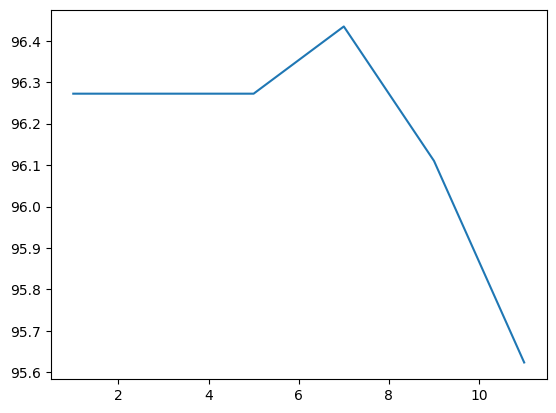

In [64]:
#####使用验证集来选择超参数
possible_k_list = [1,3,5,7,9,11] # 在本次实验中候选的超参数取值
accs = [] # 将每个取值k对应的验证集准确率加入列表
for k in possible_k_list:
    #####模型的超参数设置为k
    model = KNN_model(k)
    #####在训练集上训练, 提示: model.train()
    model.train(X_train, Y_train)
    #####在验证集X_valid上给出预测结果 Y_pred_valid, 提示：model.test()
    Y_pred_valid = model.test(X_valid)
    #####计算验证集上的准确率
    acc_k = cal_accuracy(Y_pred_valid, Y_valid)
    #####将每个取值k对应的验证集准确率加入列表
    accs.append(acc_k)
    print('k={}, accuracy on validation={}%'.format(k, acc_k))

import matplotlib.pyplot as plt
plt.plot(possible_k_list, accs) #画出每个k对应的验证集准确率

#####基于上面的结果确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试

#####定义最好的k对应的模型
pass

#####在训练集上训练，注意这里可以使用全部的训练数据
pass

#####在测试集上测试生成预测 Y_pred_test
pass
print('Test Accuracy={}%'.format(cal_accuracy(Y_pred_test, Y_test)))

#####以下需要实现5折交叉验证，可以参考之前训练集和验证集划分的方式
folds = 5

for k in possible_k_list: # 遍历所有可能的k
    print('******k={}******'.format(k))
    valid_accs = []
    for i in range(folds): # 第i折的实验
        ##### 生成第i折的训练集 X_train_i, Y_train_i和验证集 X_valid_i, Y_valid_i; 提示：可参考之前random shuffle的方式来生成index
        pass
        ##### 定义超参数设置为k的模型
        pass
        ##### 在Fold-i上进行训练
        pass
        ##### 给出Fold-i验证集X_valid_i上的预测结果 Y_pred_valid_i
        pass
        acc = cal_accuracy(Y_pred_valid_i, Y_valid_i)
        valid_accs.append(acc)
        print('Valid Accuracy on Fold-{}: {}%'.format(i+1, acc))
    
    print('k={}, Accuracy {}+-{}%'.format(k, np.mean(valid_accs), np.std(valid_accs)))

In [65]:
#####基于交叉验证确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试
#####定义最好的k对应的模型
best_k = 7
#####在训练集上训练，注意这里可以使用全部的训练数据
best_model = KNN_model(best_k)
#####在测试集上测试生成预测 Y_pred_test
best_model.train(X, Y)
Y_pred_test = best_model.test(X_test)
print('Test Accuracy chosing k using cross-validation={}%'.format(cal_accuracy(Y_pred_test, Y_test)))


Test Accuracy chosing k using cross-validation=96.575%


In [67]:
#####以下需要实现5折交叉验证，可以参考之前训练集和验证集划分的方式
folds = 5

for k in possible_k_list: # 遍历所有可能的k
    print('******k={}******'.format(k))
    valid_accs = []
    for i in range(folds): # 第i折的实验
        ##### 生成第i折的训练集 X_train_i, Y_train_i和验证集 X_valid_i, Y_valid_i; 提示：可参考之前random shuffle的方式来生成index
        random.seed(777777) #定下随机种子
        N = X.shape[0] 
        indices = np.random.permutation(N)
        valid_frac = 1/folds 
        valid_size = int(N*valid_frac)

        valid_indices = indices[i * valid_size: (i + 1) * valid_size]
        train_indices = np.setdiff1d(indices, valid_indices)

        X_train_i, Y_train_i = X[train_indices], Y[train_indices]
        X_valid_i, Y_valid_i = X[valid_indices], Y[valid_indices]

        ##### 定义超参数设置为k的模型
        model = KNN_model(k=k)
        model.train(X_train_i, Y_train_i)
        
        ##### 在Fold-i上进行训练
        model.train(X_train_i, Y_train_i)
        
        ##### 给出Fold-i验证集X_valid_i上的预测结果 Y_pred_valid_i
        Y_pred_valid_i = model.test(X_valid_i)
        acc = cal_accuracy(Y_pred_valid_i, Y_valid_i)
        valid_accs.append(acc)
        print('Valid Accuracy on Fold-{}: {}%'.format(i+1, acc))
    
    print('k={}, Accuracy {}+-{}%'.format(k, np.mean(valid_accs), np.std(valid_accs)))

******k=1******
Valid Accuracy on Fold-1: 95.46191247974069%
Valid Accuracy on Fold-2: 95.9481361426256%
Valid Accuracy on Fold-3: 94.6515397082658%
Valid Accuracy on Fold-4: 94.97568881685575%
Valid Accuracy on Fold-5: 94.6515397082658%
k=1, Accuracy 95.13776337115071+-0.5021696397027438%
******k=3******
Valid Accuracy on Fold-1: 96.11021069692059%
Valid Accuracy on Fold-2: 96.27228525121556%
Valid Accuracy on Fold-3: 96.27228525121556%
Valid Accuracy on Fold-4: 96.75850891410049%
Valid Accuracy on Fold-5: 96.27228525121556%
k=3, Accuracy 96.33711507293356+-0.21984862181929446%
******k=5******
Valid Accuracy on Fold-1: 97.24473257698541%
Valid Accuracy on Fold-2: 98.05510534846029%
Valid Accuracy on Fold-3: 96.75850891410049%
Valid Accuracy on Fold-4: 98.05510534846029%
Valid Accuracy on Fold-5: 97.24473257698541%
k=5, Accuracy 97.47163695299838+-0.5084080110650905%
******k=7******
Valid Accuracy on Fold-1: 95.2998379254457%
Valid Accuracy on Fold-2: 96.5964343598055%
Valid Accuracy o

In [68]:
#####基于交叉验证确定验证集上的最好的超参数k，根据这个k最终在测试集上进行测试
#####定义最好的k对应的模型
best_k = 7
#####在训练集上训练，注意这里可以使用全部的训练数据
best_model = KNN_model(best_k)
#####在测试集上测试生成预测 Y_pred_test
best_model.train(X, Y)
Y_pred_test = best_model.test(X_test)
print('Test Accuracy chosing k using cross-validation={}%'.format(cal_accuracy(Y_pred_test, Y_test)))


Test Accuracy chosing k using cross-validation=96.575%


In [69]:
#####如果训练/测试集不均衡如果评估模型呢？
#####生成一个不均衡的测试集，由于示例数据集中所有的标签1都在后面所以出于方便直接这样来生成一个不均衡的测试集
N_test = int(X_test.shape[0]*0.7)
X_test, Y_test = X_test[:N_test], Y_test[:N_test]
print(Counter(Y_test)) # 输出新的测试集中的标签分布

model = KNN_model(k=best_k) # 此处请填入交叉验证确定的最好的k
model.train(X, Y)
Y_pred_test = model.test(X_test)

#实现计算percision， recall和F1 score的函数
def cal_prec_recall_f1(Y_pred, Y_gt):
    '''
    Input: predicted labels y_pred, ground truth labels Y_gt
    Retur: precision, recall, and F1 score
    '''
    TP = np.sum((Y_pred == 1) & (Y_gt == 1))
    FP = np.sum((Y_pred == 1) & (Y_gt == 0))
    FN = np.sum((Y_pred == 0) & (Y_gt == 1))
    TN = np.sum((Y_pred == 0) & (Y_gt == 0))
    
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    
    return precision, recall, f1
    
print(cal_prec_recall_f1(Y_pred_test, Y_test))

Counter({np.int64(0): 2000, np.int64(1): 800})
(np.float64(0.910271546635183), np.float64(0.96375), np.float64(0.936247723132969))


# 问题和思考
问题是一开始做knn的时候查了一些numpy的用法，然后就是jupyter不支持补全，所以导致我有个地方写错了一直没有纠正，然后查了1个小时才发现是写错了一个字母....
还有就是precision和recall要考虑分母为0的情况。
思考就是，完整的过了一遍机器学习的流程，挺好的感觉，就是可以用py可能比notebook方便QAQ...

In [ ]:
# 221300079 王俊童 人工智能学院

# 由于发现这个东西不支持中文，我就在这里直接说好了，用python注释的形式来说。

# 问题和思考

# 问题是一开始做knn的时候查了一些numpy的用法，然后就是jupyter不支持补全，所以导致我有个地方写错了一直没有纠正，然后查了1个小时才发现是写错了一个字母.... 
# 还有就是precision和recall要考虑分母为0的情况。 

# 思考就是，完整的过了一遍机器学习的流程，挺好的感觉，就是可以用py可能比notebook方便QAQ...